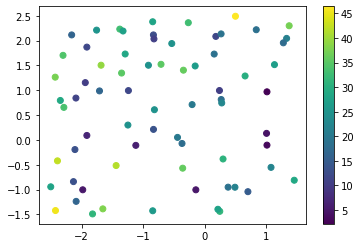

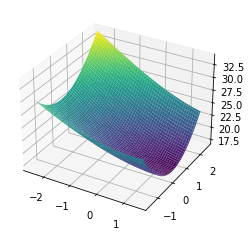

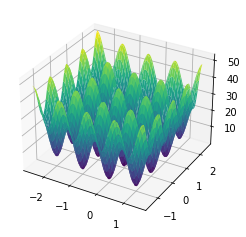

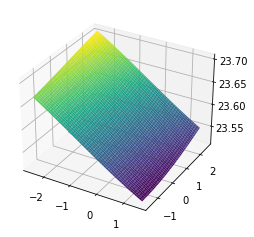

In [13]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)
n = 70
lower = [-2.5, -1.5]
upper = [1.5, 2.5]
x = np.column_stack((np.random.uniform(lower[0], upper[0], n),
                     np.random.uniform(lower[1], upper[1], n)))
f = lambda x: 20 + x[:, 0]**2 + x[:, 1]**2 - 10*(np.cos(2*np.pi*x[:, 0]) + np.cos(2*np.pi*x[:, 1]))
y = f(x)

df = pd.DataFrame({'x1': x[:, 0], 'x2': x[:, 1], 'y': y})
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='viridis')
plt.colorbar()
plt.show()

np.random.seed(1)
model = SVR(kernel='rbf', C=1e3, gamma=1/n, epsilon=0.1)
model.fit(x, y)

nplot_dim = 100
xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim),
                    np.linspace(lower[1], upper[1], nplot_dim))
xtest = np.column_stack((xplot[0].ravel(), xplot[1].ravel()))
yplot = model.predict(xtest)
yplot = yplot.reshape(xplot[0].shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xplot[0], xplot[1], yplot, cmap='viridis')
plt.show()

yplot2 = f(np.column_stack((xplot[0].ravel(), xplot[1].ravel())))
yplot2 = yplot2.reshape(xplot[0].shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xplot[0], xplot[1],  yplot2, cmap='viridis') 
plt.show()

np.random.seed(1)
model = SVR(kernel='rbf', C=1e-1, gamma=1/n, epsilon=0.1, tol=0.1)
model.fit(x, y)
yplot = model.predict(xtest)
yplot = yplot.reshape(xplot[0].shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xplot[0], xplot[1], yplot, cmap='viridis')
plt.show()

def uniformRandomSearch(fun, lower, upper, control={'funEvals': 200}):
    npar = len(lower)
    xtest = np.random.uniform(lower, upper, size=(control['funEvals'], npar))
    ytest = np.apply_along_axis(fun, 1, xtest)
    best_index = np.argmin(ytest)
    print(xtest[best_index])
    return {'xbest': xtest[best_index], 'ybest': ytest[best_index], 'count': xtest.shape[0]}

def fun(pars):
    np.random.seed(1)
    model = SVR(kernel='rbf', C=10**pars[1], gamma=1/n, epsilon=10**pars[0], tol=10**pars[2])
    model.fit(x, y)
    return model.score